In [1]:
import numpy as np
import pandas as pd
import src.potential1D as pot
import src.system as system1D
import src.conveyorBelt as cvb
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colorbar
%matplotlib inline

In [2]:
numsys = 8
steps = 100000

In [3]:
ens=cvb.Ensemble(0.0, numsys, 
                 system=system1D.system1D(
                     potential=pot.pertHarmonicOsc1D(fc=1.0, alpha=10.0, gamma=0.0)
                 ),
                 build=False)
ens.propagate()
ens

0      0.04     2.242
1      0.29     0.527
2      0.54     0.947
3      0.79     1.187
4      0.96     0.032
5      0.71     0.027
6      0.46     0.128
7      0.21     2.336

In [4]:
ens.traj_clear()
systrajs, traj=cvb.calc_traj(steps=steps, ens=ens)

Rejected  20960


In [5]:
traj=pd.DataFrame(traj, columns=['Step', 'CapLam', 'Energy', 'Bias'])
traj.head()

,Step,CapLam,Energy,Bias
0,0.0,0.140306,7.423748,0.0
1,1.0,0.168039,7.469693,0.0
2,2.0,5.832045,4.676203,0.0
3,3.0,5.832045,12.545554,0.0
4,4.0,5.270312,18.369641,0.0


In [6]:
print(systrajs[0])

[[ 1.00000000e+00  1.15009275e+00  3.00000000e+02  0.00000000e+00
   0.00000000e+00  1.01510716e+00  1.01510716e+00  5.34886111e-02
   6.61356665e+00]
 [ 1.00000000e+00  1.24602127e+00  3.00000000e+02  0.00000000e+00
   0.00000000e+00  3.13221954e+00  3.13221954e+00  3.03488611e-01
   7.76284499e+00]
 [ 1.00000000e+00  5.41891563e-01  3.00000000e+02  0.00000000e+00
   0.00000000e+00  9.59473105e-01  9.59473105e-01  5.53488611e-01
   1.46823233e+00]
 [ 1.00000000e+00 -2.83478945e-01  3.00000000e+02  0.00000000e+00
   0.00000000e+00  3.63023134e-01  3.63023134e-01  8.03488611e-01
   4.01801561e-01]
 [ 1.00000000e+00 -7.73759561e-02  3.00000000e+02  0.00000000e+00
   0.00000000e+00  3.13275203e-02  3.13275203e-02  9.46511389e-01
   2.99351929e-02]
 [ 1.00000000e+00 -8.11992699e-02  3.00000000e+02  0.00000000e+00
   0.00000000e+00  2.62582780e-02  2.62582780e-02  6.96511389e-01
   3.29666071e-02]
 [ 1.00000000e+00 -2.14418281e-01  3.00000000e+02  0.00000000e+00
   0.00000000e+00  1.2562984

In [7]:
nbins=100
bins=np.zeros(nbins)
dhdlbins=np.zeros(nbins)
for i in range(numsys):
    for j in range(systrajs[:,i,:].shape[0]):
        index=int(np.floor(systrajs[j,i,7]*nbins))
        if index == nbins:
            index=nbins-1
        bins[index]+=1
        dhdlbins[index]+=systrajs[j, i, 8]
dhdlbins/=bins
dhdlbins

array([12.26027624, 11.01708962, 10.2151651 ,  9.10392348,  8.90102026,
        8.49640822,  7.44428864,  7.34917125,  6.73527242,  6.31082566,
        6.09153736,  5.89274209,  5.44482694,  5.33316281,  5.11794547,
        4.95165702,  4.5987872 ,  4.47541293,  4.53198683,  4.15225078,
        4.08147669,  3.93687224,  3.80641376,  3.76327377,  3.55352594,
        3.49346198,  3.4552483 ,  3.34648655,  3.28415264,  3.11517109,
        2.98998861,  3.00787809,  2.92499095,  2.85467531,  2.78382598,
        2.65281966,  2.67456907,  2.65446772,  2.50107799,  2.52668771,
        2.46423052,  2.44408011,  2.34405543,  2.26038536,  2.30245645,
        2.1724867 ,  2.18017907,  2.12225292,  2.13332861,  2.03997054,
        2.1032291 ,  2.03092781,  2.03055281,  1.953535  ,  1.88532346,
        1.97908854,  1.9149672 ,  1.88698688,  1.80897495,  1.85012834,
        1.78904139,  1.74175178,  1.74095731,  1.6669761 ,  1.68896397,
        1.63922523,  1.63962694,  1.59873672,  1.58027758,  1.60

Integral =  3.0010579379275346


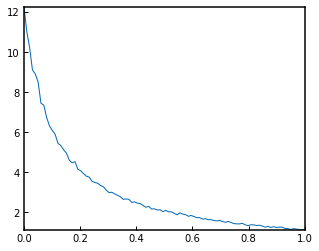

In [8]:
plt.plot(np.linspace(0,1,nbins), dhdlbins)
integral=np.sum(dhdlbins)*1.0/nbins
print('Integral = ', integral)

(0.14, 0.185)

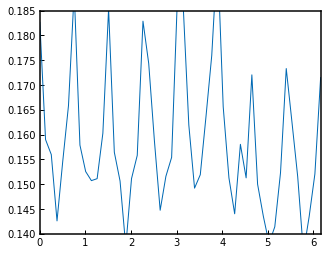

In [9]:
h1=np.histogram(traj.CapLam, bins=50, density=1)
plt.plot(h1[1][:-1], h1[0])
plt.ylim(0.14, 0.185)

Text(0, 0.5, '$\\lambda$')

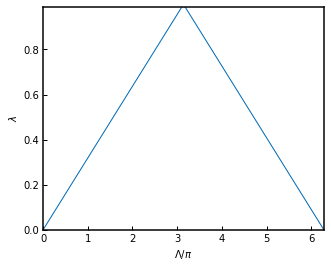

In [10]:
caplam = np.linspace(0, 2*np.pi, 100)
x=[]
for i in caplam:
    x.append(ens.calc_lam(i, 0))
plt.plot(caplam, x)
plt.xlabel('$\Lambda / \pi$')
plt.ylabel('$\lambda$')

In [11]:
#analytical
u=1.66053886e-27
NA=6.0221415e23
hbar=1.054571800e-34*1e12*1e-3*NA  #kJ/mol*ps
R=0.00831446 #kJ/mol/K
mu=0.5  #u
T=300.0  #K
fc1=1  #kJ/nm^2/mol
fc2=11.0 #kJ/nm^2/mol
omega1=np.sqrt(fc1/mu)
omega2=np.sqrt(fc2/mu)
print('Omega', omega1, omega2)
alpha1=hbar*np.sqrt(fc1/mu)/(R*T)
alpha2=hbar*np.sqrt(fc2/mu)/(R*T)
print(alpha1, alpha2)
Z1=np.exp(-alpha1/2.0)/(1-np.exp(-alpha1))
Z2=np.exp(-alpha2/2.0)/(1-np.exp(-alpha2))
F1=-R*T*np.log(Z1)
F2=-R*T*np.log(Z2)
DF=F2-F1
DF2=-R*T*np.log(Z2/Z1)
print(DF, DF2, F1, F2)

Omega 1.4142135623730951 4.69041575982343
0.03600698886161772 0.11942167188449208
2.991927940369414 2.991927940369415 -8.291150088634001 -5.299222148264588


In [12]:
import plotConveyorBelt

lam = np.linspace(0, 1, nbins)
ene = np.cumsum(dhdlbins)/nbins

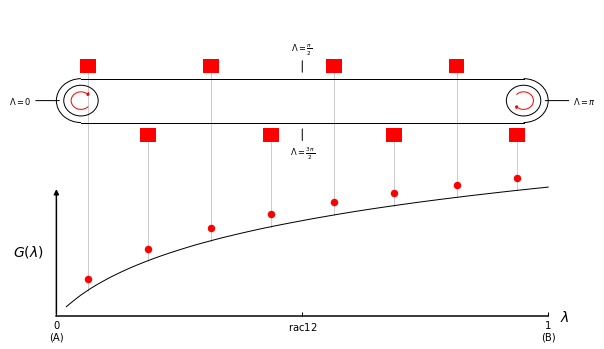

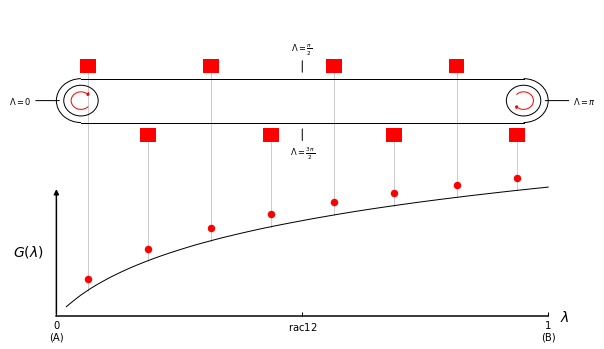

In [13]:
plotConveyorBelt.drawConveyorBelt(lam, ene, CapLam=0.2, M=8)

In [14]:
from ipywidgets import interact, interactive, fixed, widgets
import ipywidgets
from matplotlib import pylab

In [15]:
def plotCVB(CapLam, M):
    fig = plotConveyorBelt.drawConveyorBelt(lam, ene, CapLam=CapLam, M=M)
    plt.show()

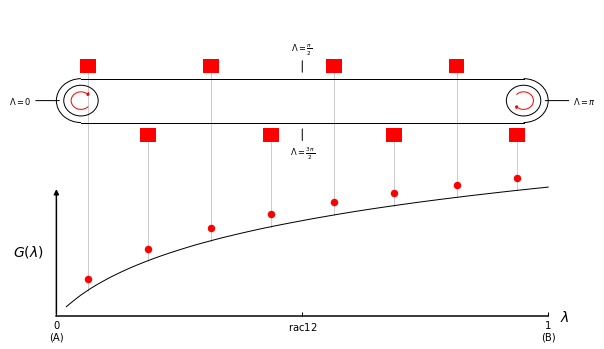

In [16]:
%matplotlib inline
plotCVB(0.2, 8)

In [18]:
interact(plotCVB, CapLam=(0, 2*np.pi, 0.01*np.pi), M=(2, 32, 2))

interactive(children=(FloatSlider(value=3.1101767270538954, description='CapLam', max=6.283185307179586, step=…

<function __main__.plotCVB(CapLam, M)>